In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [117]:
data = pd.read_csv("Employee-salary-prediction.csv")


In [118]:
print(data.head(6))

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   
5  29.0    Male      Bachelor's  Marketing Analyst                  2.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
5   55000.0  


# EDA

In [119]:
print("Shape:",data.shape)

Shape: (375, 6)


In [122]:
print("Null Detail\n",data.isnull().sum())

Null Detail
 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [123]:
print(data.isnull().sum().unique(),"Null Values are getting Droped")

[2] Null Values Droped


In [124]:
data.dropna(inplace=True)


In [125]:
print(data[data.duplicated()].count())

Age                    49
Gender                 49
Education Level        49
Job Title              49
Years of Experience    49
Salary                 49
dtype: int64


In [127]:
print(data[data.duplicated()].count().unique(),"Duplicate Values are getting Droped")

[49] Duplicate Values are getting Droped


In [128]:
data.drop_duplicates(inplace=True)

In [129]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


# Univariate Analysis

In [130]:
print(data.describe())

              Age  Years of Experience         Salary
count  324.000000           324.000000     324.000000
mean    37.382716            10.058642   99985.648148
std      7.185844             6.650470   48652.271440
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.500000             9.000000   95000.000000
75%     44.000000            16.000000  140000.000000
max     53.000000            25.000000  250000.000000


In [168]:
print('Job Title and Counts\n')
print(data['Job Title'].value_counts())


Job Title and Counts

Job Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64


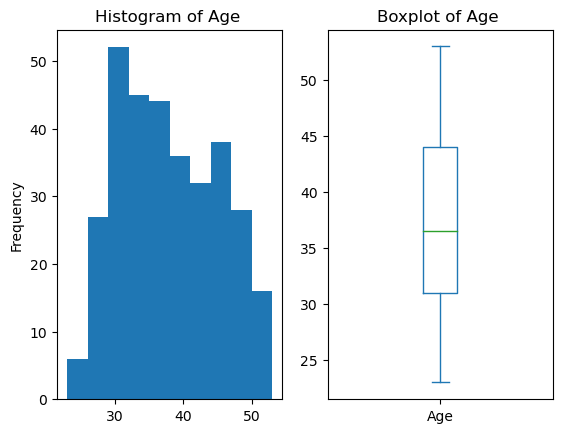

In [177]:
plt.subplot(1,2,1)
plt.title("Histogram of Age ")
data['Age'].plot(kind='hist')
plt.subplot(1,2,2)
plt.title("Boxplot of Age ")
data['Age'].plot(kind='box')
plt.show()

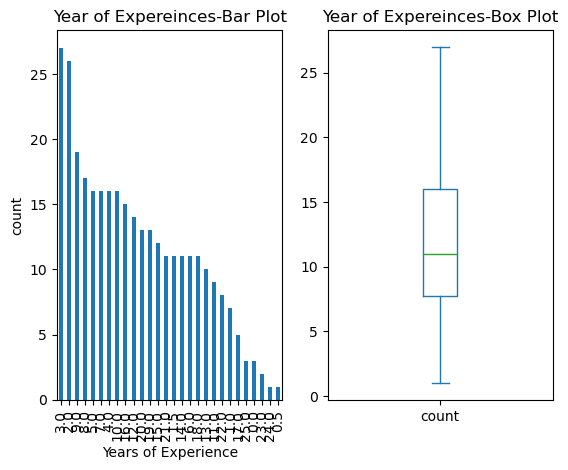

In [185]:
plt.subplot(1,2,1)
plt.title("Year of Expereinces-Bar Plot")
data['Years of Experience'].value_counts().plot(kind='bar')
plt.ylabel("count")
plt.subplot(1,2,2)
plt.title("Year of Expereinces-Box Plot")
data['Years of Experience'].value_counts().plot(kind='box')
plt.show()


Axes(0.125,0.11;0.775x0.77)


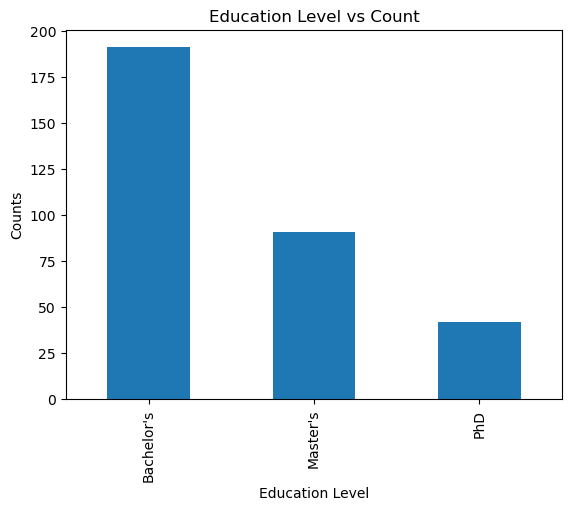

In [154]:
plt.title("Education Level-Bar Plot")
print(data['Education Level'].value_counts().plot(kind='bar'))
plt.ylabel("Counts")
plt.show()

# Bivariate Analysis

Axes(0.125,0.11;0.775x0.77)


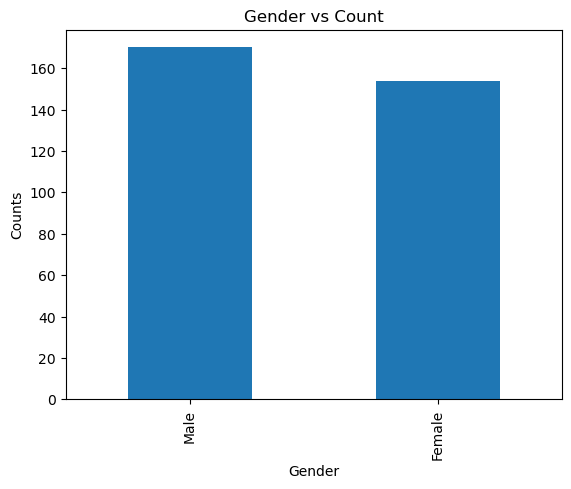

In [155]:
plt.title("Gender vs Count")
print(data['Gender'].value_counts().plot(kind='bar'))
plt.ylabel("Counts")
plt.show()

In [139]:
correlation_matrix = data[['Age','Years of Experience','Salary']].corr()
print(correlation_matrix)

                          Age  Years of Experience    Salary
Age                  1.000000             0.979192  0.916543
Years of Experience  0.979192             1.000000  0.924455
Salary               0.916543             0.924455  1.000000


Axes(0.125,0.11;0.62x0.77)


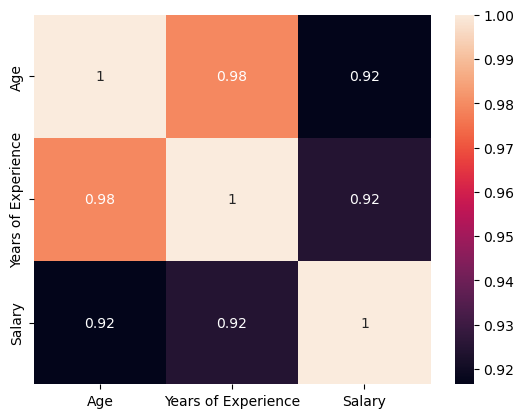

In [141]:
print(sns.heatmap(correlation_matrix,annot=True))

# Feature Engineering

# LabelEncoding:To convert Categorical Features to Numerical Features

In [196]:
Encoder=LabelEncoder()

In [198]:
columns=data.columns
for i in  columns :
    if data[i].dtype==object:
        data[i]=Encoder.fit_transform(data[i])

# Data After Encoding

In [201]:
print(data.head(5))

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


# Feature Scaling

In [206]:
scaler=StandardScaler()
data['Age']=scaler.fit_transform(data[['Age']])
data['Years of Experience']=scaler.fit_transform(data[['Years of Experience']])

In [211]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,-0.750231,1,0,159,-0.761821,90000.0
1,-1.307742,0,1,17,-1.063017,65000.0
2,1.061680,1,2,130,0.744158,150000.0
3,-0.192720,0,0,101,-0.460625,60000.0
4,2.037324,1,1,22,1.497148,200000.0
...,...,...,...,...,...,...
348,-1.307742,0,0,68,-1.364212,35000.0
349,-0.192720,1,0,111,-0.310027,110000.0
350,0.922302,0,2,115,0.894756,160000.0
351,-0.889609,1,0,63,-1.063017,55000.0


In [214]:
X=data.drop('Salary',axis=1)
y=data['Salary']

In [217]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=42)

In [218]:
linear_model=LinearRegression()


In [219]:
linear_model.fit(X_train,y_train)
y_predict=linear_model.predict(X_test)


In [230]:
prediction=pd.DataFrame({'actual':y_test,'predicted':y_predict})


In [231]:
prediction['error']=prediction['actual']-prediction['predicted']

In [232]:
prediction

,actual,predicted,error
132,100000.0,117345.419457,-17345.419457
108,100000.0,124674.784548,-24674.784548
137,50000.0,48238.738941,1761.261059
9,110000.0,132836.245426,-22836.245426
181,105000.0,108759.809316,-3759.809316
...,...,...,...
69,150000.0,158271.191939,-8271.191939
97,35000.0,37734.780862,-2734.780862
163,80000.0,80512.418495,-512.418495
68,90000.0,95116.047397,-5116.047397


In [233]:
print(r2_score(y_test,y_predict))

0.877354077961905


In [235]:
linear_model.coef_

array([2.18511937e+04, 8.55691687e+03, 1.78523266e+04, 2.01289690e+01,
       1.57597189e+04])

In [236]:
linear_model.intercept_

83814.52820343128